## (i) Problem Identification
My aim to estimate house prices based on features such as area, number of bedrooms, location, and year built. This is a **regression problem** because the target variable (Price) is continuous. The goal is to build predictive models to estimate house prices accurately.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/content/House Price Prediction Dataset.csv')


In [ ]:
# Basic info
print(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
# Drop Id for analysis
df_analysis = df.drop('Id', axis=1)

In [ ]:
type(df)  #data type

pandas.core.frame.DataFrame

In [ ]:
df.shape # check dimension

(2000, 10)

In [ ]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
#Show me the locations where the null values are
df[df.isnull().any(axis=1)]

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [ ]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
df.dtypes  # checking the data type of every column

,0
Id,int64
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object
Price,int64


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


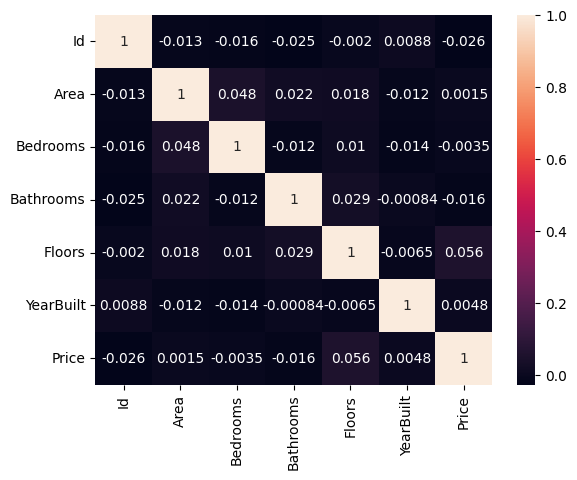

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix for numerical columns
%time
# Changed dataTrain to df_cleaned, assuming this is the dataframe intended for correlation analysis
corr = df_cleaned.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [ ]:
!pip install fireducks # optional for the assignment


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 12.2 µs


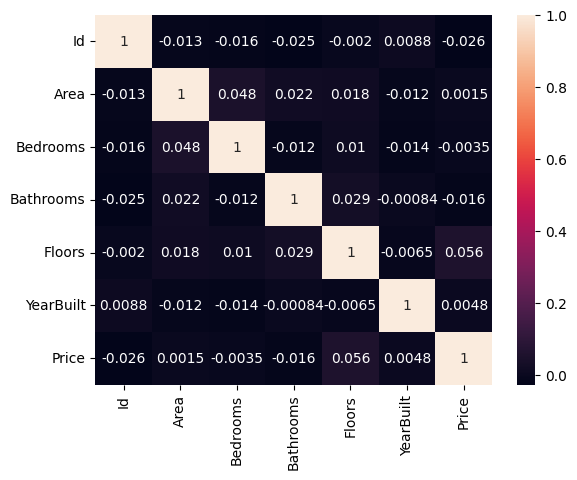

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import fireducks.pandas as pd
 #importing the pandas module that is found inside the fireducks library.
 # FireDucks is a DataFrame library specifically designed to accelerate pandas operations

#Load the data - Changed the filename to match the dataset loaded earlier
dataTrain_fd = pd.read_csv("/content/House Price Prediction Dataset.csv")
dataTrain_fd = dataTrain_fd.dropna()

%time
corr = dataTrain_fd.select_dtypes(include=['number']).corr() #find corr

# Plot the heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

plt.show()

In [6]:
dataTrain_fd = pd.read_csv("/content/House Price Prediction Dataset.csv")

In [7]:
dataTrain_fd.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [9]:
#Search for price = 1 , if so, change the price to 500
dataTrain_fd.loc[dataTrain_fd['price_usd'] == 1, 'price_usd'] = 500

In [14]:

dataTrain_fd.loc[dataTrain_fd['Price'] == 1, 'Price'] = 500

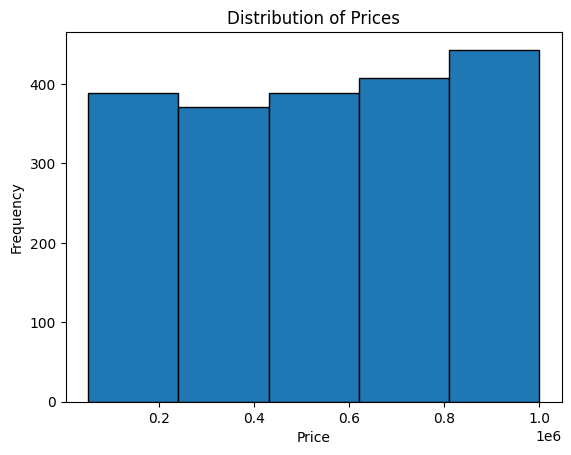

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import fireducks.pandas as pd
# Plot the histogram using the correct column name 'Price'
dataTrain_fd['Price'].plot(kind='hist', bins=5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [28]:
dataTrain_fd.describe(include = 'object')

,Location,Condition,Garage
count,2000,2000,2000
unique,4,4,2
top,Downtown,Fair,No
freq,558,521,1038


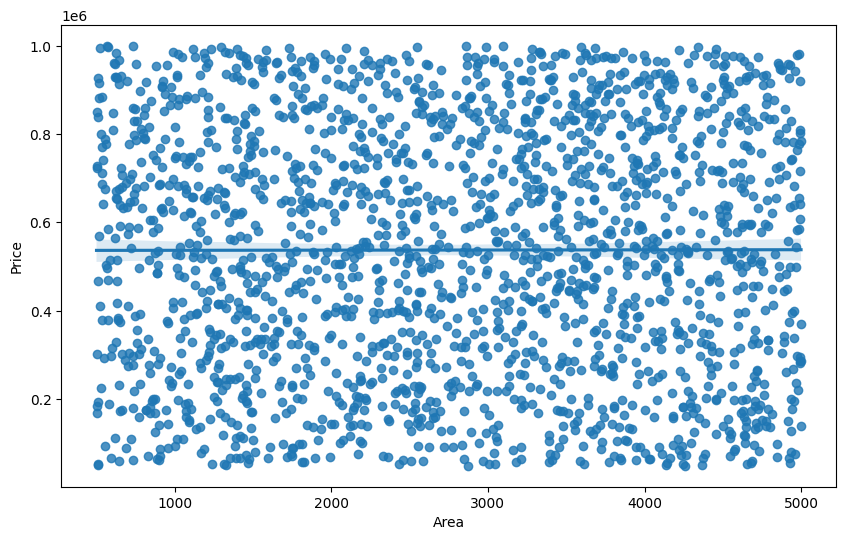

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="Area", y="Price", data=dataTrain_fd) # Example: plotting Area vs Price
plt.show()

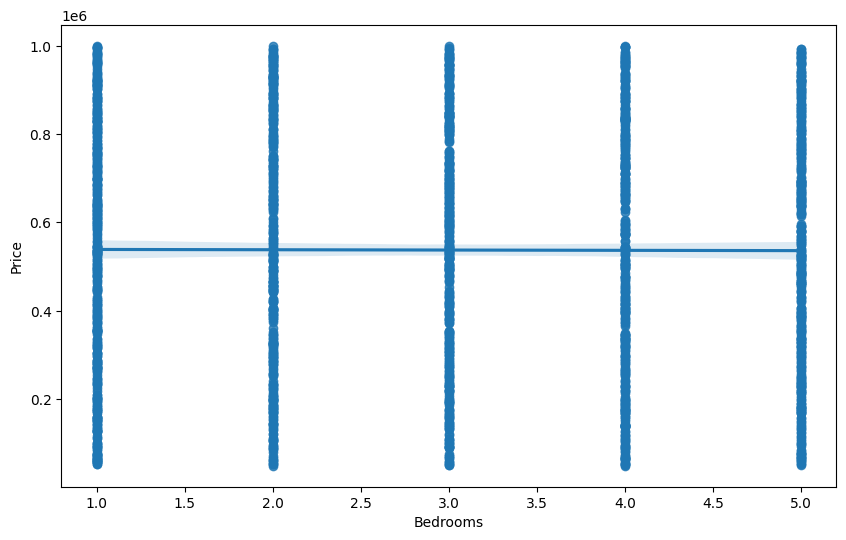

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="Bedrooms", y="Price", data=dataTrain_fd) # Example: plotting Area vs Price
plt.show()

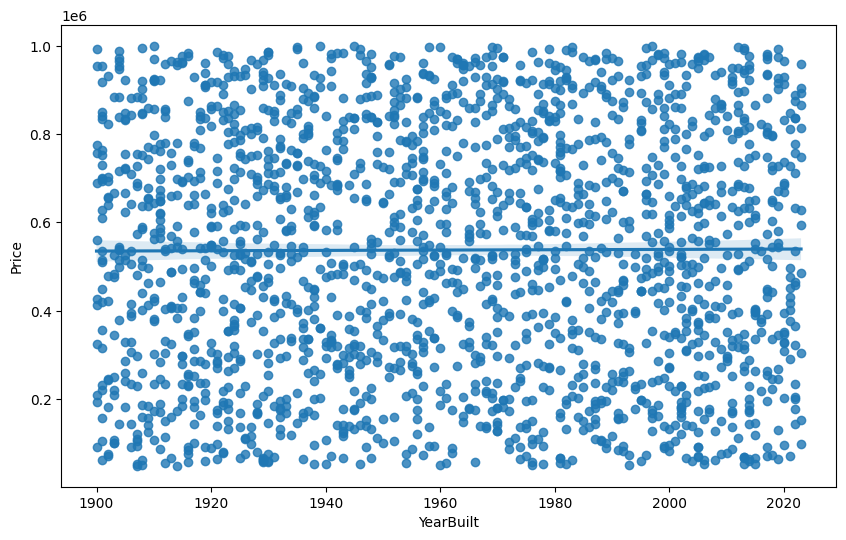

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="YearBuilt", y="Price", data=dataTrain_fd) # Example: plotting Area vs Price
plt.show()

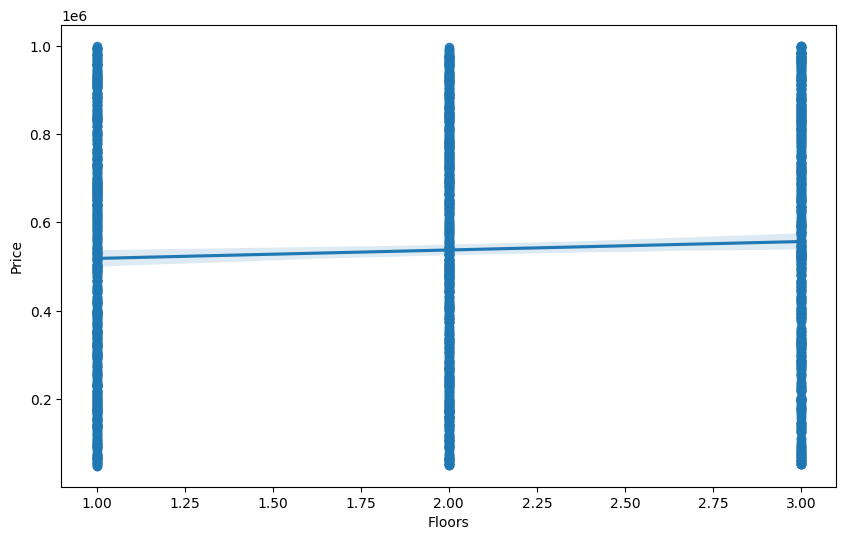

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.regplot(x="Floors", y="Price", data=dataTrain_fd) # Example: plotting Area vs Price
plt.show()

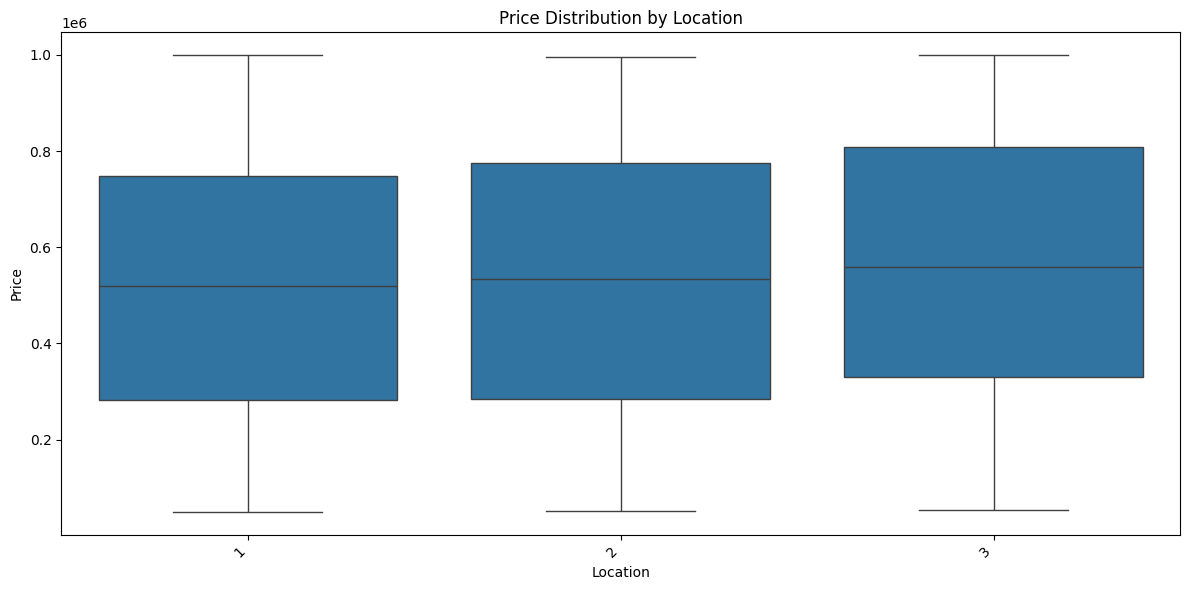

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x="Floors", y="Price", data=dataTrain_fd)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price Distribution by Location')
plt.tight_layout()
plt.show()

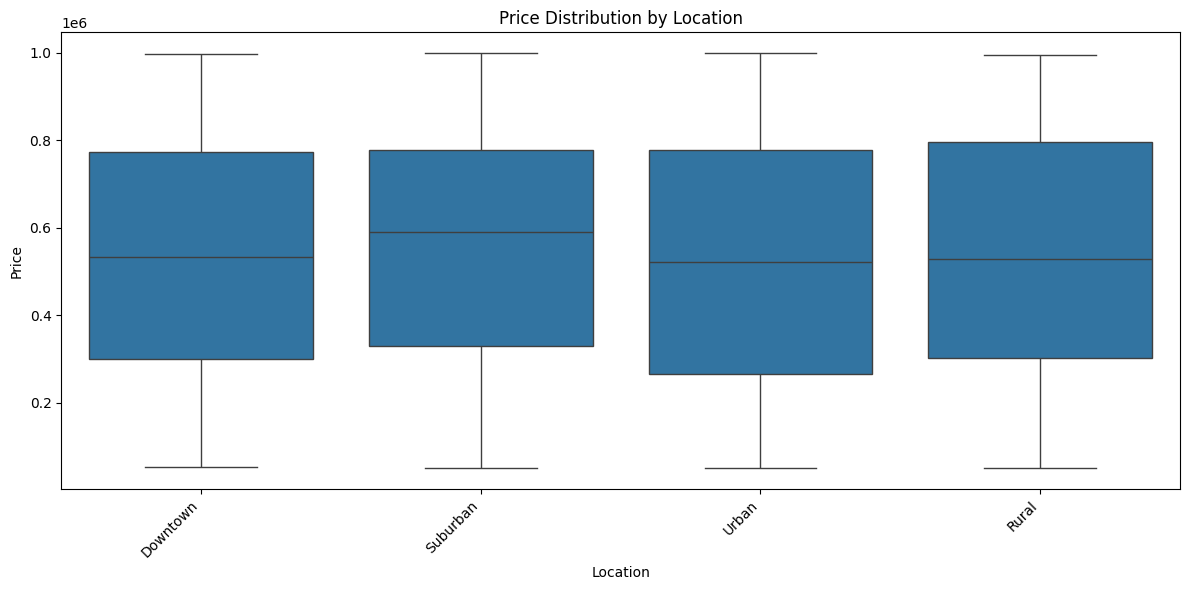

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Price", data=dataTrain_fd)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price Distribution by Location')
plt.tight_layout()
plt.show()

(iii) Data Preprocessing and Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Drop missing values
df_cleaned = df.dropna()


In [ ]:
# Label Encoding
label_enc = LabelEncoder()
for col in ['Location', 'Condition', 'Garage']:
    df_cleaned[col] = label_enc.fit_transform(df_cleaned[col])

In [ ]:
# Normalization
scaler = MinMaxScaler()
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [ ]:
# Features and Target
X = df_cleaned.drop(['Id', 'Price'], axis=1)
y = df_cleaned['Price']

print("Preprocessed feature matrix (X):")
display(X.head())
print("Target (y):")
display(y.head())

Preprocessed feature matrix (X):


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,0.190974,1.00,1.000000,1.0,0.569106,0,0,0
1,0.838373,1.00,1.000000,1.0,0.471545,0,0,0
2,0.687194,0.25,0.333333,1.0,0.308943,0,2,0
3,0.103379,0.75,0.333333,0.5,0.016260,2,1,1
4,0.983771,0.00,1.000000,0.5,0.609756,0,1,1


Target (y):


,Price
0,149919
1,424998
2,266746
3,244020
4,636056


In [61]:
# Drop missing values
df_cleaned = df.dropna()

(iv) Regression Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

## (v) Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression:")
print(f"MAE: {mae_lr:.2f}")
print(f"R²: {r2_lr:.2f}")

print("\nRandom Forest Regression:")
print(f"MAE: {mae_rf:.2f}")
print(f"R²: {r2_rf:.2f}")
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"\nBest model: {best_model}")

Linear Regression:
MAE: 244420.00
R²: -0.01

Random Forest Regression:
MAE: 254294.36
R²: -0.11

Best model: Linear Regression


(vi) Visual Comparison of Predictions

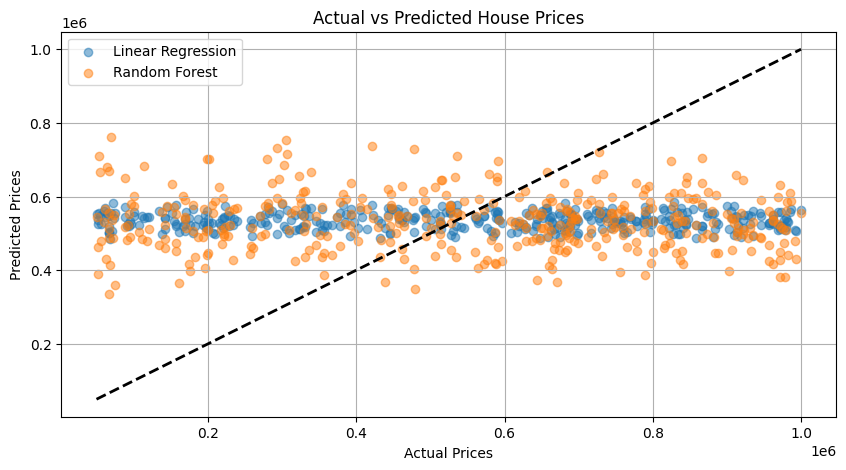

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.grid(True)
plt.show()